Found 424 images belonging to 2 classes.
Found 229 images belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 322ms/step - accuracy: 0.4998 - loss: 0.7290 - val_accuracy: 0.2140 - val_loss: 0.7498
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - accuracy: 0.4716 - loss: 0.6973 - val_accuracy: 0.2140 - val_loss: 0.7236
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.5084 - loss: 0.6911 - val_accuracy: 0.2140 - val_loss: 0.7112
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.5546 - loss: 0.6907 - val_accuracy: 0.7948 - val_loss: 0.6851
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.5565 - loss: 0.6930 - val_accuracy: 0.2140 - val_loss: 0.7046
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.5525 - loss: 0.6893 - val_accuracy: 0.2140 - val_loss: 0.7462
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.5167 - loss: 0.6971 - val_accuracy: 0.7249 - val_loss: 0.6916
Epoch 8/10
14/14 ━━━━━

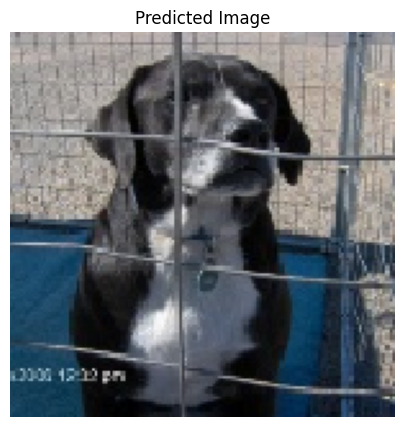

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


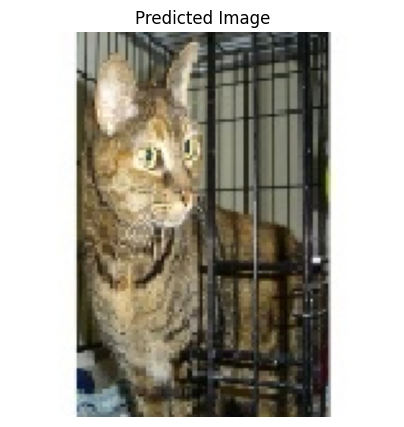

In [2]:
import warnings
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

# Define data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should only be rescaled, not augmented
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the dataset
train_generator = train_datagen.flow_from_directory(
    r'D:\vs\FDL\assignment\data\train',  # this path for train
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    r'D:\vs\FDL\assignment\data\test',  # this path for test
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Helps reduce overfitting

    Dense(2, activation='softmax')  # Adjust to 2 classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Define EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Save the trained model
model.save('catanddog.keras')
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Load the trained model
loaded_model = load_model('catanddog.keras')
loaded_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# List of image paths for prediction
image_paths = [
    r'D:\vs\FDL\assignment\data\test\dog\dog_test1004.jpg',
    r'D:\vs\FDL\assignment\data\test\cat\cat1791.jpg',  # Add your second image path here
]

# Loop through each image path, process the image, and make predictions
for image_path in image_paths:
    # Load and preprocess the image
    image = load_img(image_path, target_size=(150, 150))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0  # Apply the same scaling as training data

    # Get predictions
    predictions = model.predict(image_array)
    
    # Assuming the model outputs probabilities for different classes
    predicted_class = np.argmax(predictions[0])
    # Plot the original image with its prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title('Predicted Image')
    plt.axis('off')
    plt.show()